# September 20

## Putting it all together

Up to this point, we have walked through tasks that are often
involved in handling and processing data using the workshop ready cleaned
files that we have provided. In this wrap-up exercise, we will perform
many of the same tasks with real data sets. This lesson also covers data
visualization.

As opposed to the previous ones, this lesson does not give step-by-step
directions to each of the tasks. Use the lesson materials you've already gone
through as well as the Python documentation to help you along.

## Obtain data

There are many repositories online from which you can obtain data. We are
providing you with one data file to use with these exercises, but feel free to
use any data that is relevant to your research. The file
[`bouldercreek_09_2013.txt`]({{ page.root }}/data/bouldercreek_09_2013.txt) 
contains stream discharge data, summarized at 15
15 minute intervals (in cubic feet per second) for a streamgage on Boulder
Creek at North 75th Street (USGS gage06730200) for 1-30 September 2013. If you'd
like to use this dataset, please find it in the data folder.

## Clean up your data and open it using Python and Pandas

To begin, import your data file into Python using Pandas. Did it fail? Your data
file probably has a header that Pandas does not recognize as part of the data
table. Remove this header, but do not simply delete it in a text editor! Use
either a shell script or Python to do this - you wouldn't want to do it by hand
if you had many files to process.

If you are still having trouble importing the data as a table using Pandas,
check the documentation. You can open the docstring in an ipython notebook using
a question mark. For example:

In [1]:
import pandas as pd
surveys = pd.read_csv("../data/bouldercreek_09_2013.txt", skiprows=25, sep="\t") 

In [17]:
surveys.columns = ('agency_cd', 'site_no', 'datetime', 'location', 'flow_rate', 'height')


In [19]:
surveys = surveys[1:]
surveys.drop(0, axis=0)
surveys.drop(surveys.index[0])
surveys.drop([0])

Look through the function arguments to see if there is a default value that is
different from what your file requires (Hint: the problem is most likely the
delimiter or separator. Common delimiters are `','` for comma, `' '` for space,
and `'\t'` for tab).

Create a DataFrame that includes only the values of the data that are useful to
you. In the streamgage file, those values might be the date, time, and discharge
measurements. Convert any measurements in imperial units into SI units. You can
also change the name of the columns in the DataFrame like this:

In [ ]:
df = pd.DataFrame({'1stcolumn':[100,200], '2ndcolumn':[10,20]}) # this just creates a DataFrame for the example!
print('With the old column names:\n') # the \n makes a new line, so it's easier to see
print(df)

df.columns = ['FirstColumn','SecondColumn'] # rename the columns!
print('\n\nWith the new column names:\n')
df


## Matplotlib package

[Matplotlib](https://matplotlib.org/) is a Python package that is widely used throughout the scientific Python community to create high-quality and publication-ready graphics. It supports a wide range of raster and vector graphics formats including PNG, PostScript, EPS, PDF and SVG.

Moreover, matplotlib is the actual engine behind the plotting capabilities of both Pandas and plotnine packages. For example, when we call the `.plot` method on Pandas data objects, we actually use the matplotlib package.

First, import the pyplot toolbox:

In [5]:
import matplotlib.pyplot as plt

Now, let's read data and plot it!

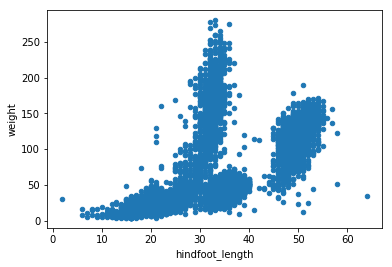

In [25]:
surveys = pd.read_csv("../data/surveys.csv")
my_plot = surveys.plot("hindfoot_length", "weight", kind="scatter")
plt.show() # not necessary in Jupyter Notebooks


![Scatter plot of survey data set](../fig/08_scatter_surveys.png)

> ## Tip
> By default, matplotlib creates a figure in a separate window. When using
> Jupyter notebooks, we can make figures appear in-line within the notebook by
> executing:
>
> ~~~
> %matplotlib inline
> ~~~

The returned object is a matplotlib object (check it yourself with `type(my_plot)`), 
to which we may make further adjustments and refinements using other matplotlib methods.

> ## Tip
> Matplotlib itself can be overwhelming, so a useful strategy is to 
> do as much as you easily can in a convenience layer, _i.e._ start
> creating the plot in Pandas or plotnine, and then use matplotlib
> for the rest.

We will cover a few basic commands for creating and formatting plots with matplotlib in this lesson. 
A great resource for help creating and styling your figures is the matplotlib gallery
(<http://matplotlib.org/gallery.html>), which includes plots in many different
styles and the source codes that create them. 


### `plt` pyplot versus object-based matplotlib

Matplotlib integrates nicely with the numpy package and can use numpy arrays 
as input of the available plot functions. Consider the following example data,
created with numpy:

In [4]:
import numpy as np

mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)


To make a scatter plot of `x` and `y`, we can use the `plot` command directly:

(array([  3.,   7.,  39., 150., 202., 262., 187., 106.,  33.,  11.]),
 array([-0.35551853, -0.28909999, -0.22268144, -0.15626289, -0.08984434,
        -0.02342579,  0.04299275,  0.1094113 ,  0.17582985,  0.2422484 ,
         0.30866694]),
 <a list of 10 Patch objects>)

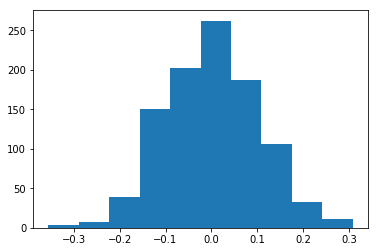

In [31]:
plt.hist(s)

> ## Tip: Cross-Platform Visualization of Figures
> Jupyter Notebooks make many aspects of data analysis and visualization much simpler. This includes
> doing some of the labor of visualizing plots for you. But, not every one of your collaborators
> will be using a Jupyter Notebook. The .show() command allows you to visualize plots
> when working at the command line, with a script, or at the iPython interpreter. In the 
> previous example, adding  `plt.show()` after the creation of the plot will enable your 
> colleagues who aren't using a Jupyter notebook to reproduce your work on their platform.
{: .callout}

or create a matplotlib `figure` and `axis` object first and add the plot later on:

(array([ 1.,  1.,  1.,  0.,  4.,  3.,  8., 14., 17., 32., 52., 66., 54.,
        64., 84., 93., 95., 74., 92., 50., 45., 47., 39., 20., 21.,  8.,
         4.,  4.,  3.,  4.]),
 array([-0.35551853, -0.33337902, -0.3112395 , -0.28909999, -0.26696047,
        -0.24482095, -0.22268144, -0.20054192, -0.17840241, -0.15626289,
        -0.13412337, -0.11198386, -0.08984434, -0.06770483, -0.04556531,
        -0.02342579, -0.00128628,  0.02085324,  0.04299275,  0.06513227,
         0.08727178,  0.1094113 ,  0.13155082,  0.15369033,  0.17582985,
         0.19796936,  0.22010888,  0.2422484 ,  0.26438791,  0.28652743,
         0.30866694]),
 <a list of 30 Patch objects>)

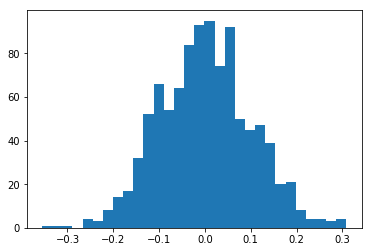

In [32]:
fig, ax = plt.subplots()  # initiate an empty figure and axis matplotlib object
ax.hist(s, 30)


Although the latter approach requires a little bit more code to create the same plot,
the advantage is that it gives us **full control** over the plot and we can add new items
such as labels, grid lines, title, etc.. For example, we can add additional axes to 
the figure and customize their labels:

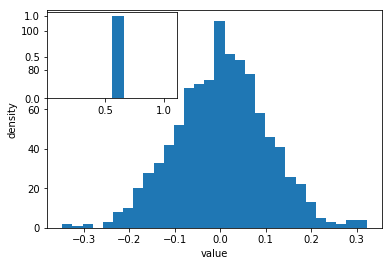

In [19]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure
ax1.hist(s, 30)

# Add a plot of a Beta distribution
a = 5
b = 10
beta_draws = np.random.beta(a, b)
# adapt the labels
ax1.set_ylabel('density')
ax1.set_xlabel('value')

# add additional axes to the figure
ax2 = fig.add_axes([0.125, 0.575, 0.3, 0.3])
#ax2 = fig.add_axes([left, bottom, right, top])
ax2.hist(beta_draws)
plt.savefig("dualdistribution.png")

### Link matplotlib, Pandas and plotnine

When we create a plot using pandas or plotnine, both libraries use matplotlib 
to create those plots. The plots created in pandas or plotnine are matplotlib 
objects, which enables us to use some of the advanced plotting options available 
in the matplotlib library. Because the objects output by pandas and plotnine
can be read by matplotlib, we have many more options than any one library can 
provide, offering a consistent environment to make publication-quality visualizations.

KeyError: 'hindfoot_length'

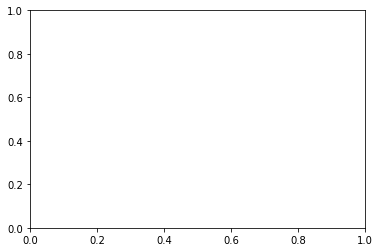

In [18]:
fig, ax1 = plt.subplots() # prepare a matplotlib figure

surveys.plot("hindfoot_length", "weight", kind="scatter", ax=ax1)

# Provide further adaptations with matplotlib:
ax1.set_xlabel("Hindfoot length", size=16)
ax1.set_ylabel("Weight", size=16)

ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Scatter plot of weight versus hindfoot length', fontsize=15)

To retrieve the matplotlib figure object from plotnine for customization, use the `draw()` function in plotnine:

/opt/tljh/user/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 4811 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


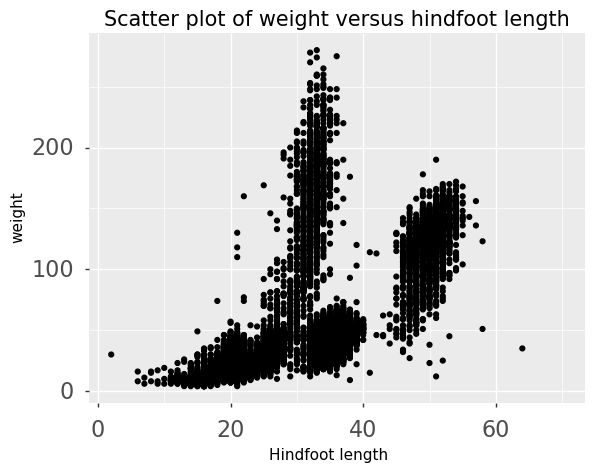

In [52]:
import plotnine as p9
myplot = (p9.ggplot(data=surveys, 
                    mapping=p9.aes(x='hindfoot_length', y='weight')) +
              p9.geom_point())

# convert output plotnine to a matplotlib object
my_plt_version = myplot.draw()

# Provide further adaptations with matplotlib:
p9_ax = my_plt_version.axes[0] # each subplot is an item in a list
p9_ax.set_xlabel("Hindfoot length")
p9_ax.tick_params(labelsize=16, pad=8)
p9_ax.set_title('Scatter plot of weight versus hindfoot length', fontsize=15)
plt.show() # not necessary in Jupyter Notebooks

Text(0.5,1,' Front Range flood event 2013')

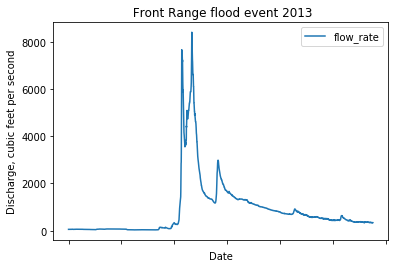

In [73]:
discharge = pd.read_csv("../data/bouldercreek_09_2013.txt", 
                        skiprows=27, sep="\t", 
                        names=["agency", "site_id", "datetime",
                               "timezone", "flow_rate", "height"])


fig, ax = plt.subplots()
discharge.plot(x ="datetime", y="flow_rate", ax=ax)
ax.set_xlabel("Date") # no label
ax.set_ylabel("Discharge, cubic feet per second")
ax1.tick_params(labelsize=16, pad=8)

ax.set_title(" Front Range flood event 2013")


No handles with labels found to put in legend.


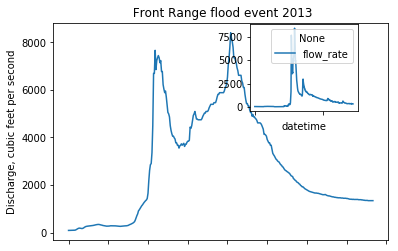

In [25]:
discharge = pd.read_csv("../data/bouldercreek_09_2013.txt", 
                        skiprows=27, delimiter="\t", 
                        names=["agency", "site_id", "datetime",
                               "timezone", "flow_rate", "height"])
fig, ax = plt.subplots()


flood = discharge[(discharge["datetime"] >= "2013-09-11") & 
                        (discharge["datetime"] < "2013-09-15")]
ax2 = fig.add_axes([0.58, 0.575, 0.25, 0.3])
flood.plot(x ="datetime", y="flow_rate", ax=ax)
ax2.legend().set_visible(False)

discharge.plot(x ="datetime", y="flow_rate", ax=ax2)
ax.set_xlabel("") # no label
ax.set_ylabel("Discharge, cubic feet per second")
ax.legend().set_visible(False)
ax.set_title(" Front Range flood event 2013")
plt.savefig("floodevent.png")


> ## Challenge - Pandas and matplotlib
> Load the streamgage data set with Pandas, subset the week of the 2013 Front Range flood
> (September 9 through 15) and create a hydrograph (line plot) of the discharge data using
> Pandas, linking it to an empty maptlotlib `ax` object. Adapt the title, x-axis and y-axis label 
> using matplotlib.
>
> > ## Answers
> >
> > ~~~
> > discharge = pd.read_csv("data/bouldercreek_09_2013.txt", 
> >                         skiprows=27, delimiter="\t", 
> >                         names=["agency", "site_id", "datetime",
> >                                "timezone", "discharge", "discharge_cd"])
> > discharge["datetime"] = pd.to_datetime(discharge["datetime"])
> > front_range = discharge[(discharge["datetime"] >= "2013-09-09") & 
> >                         (discharge["datetime"] < "2013-09-15")]
> > 
> > fig, ax = plt.subplots()
> > front_range.plot(x ="datetime", y="discharge", ax=ax)
> > ax.set_xlabel("") # no label
> > ax.set_ylabel("Discharge, cubic feet per second")
> > ax.set_title(" Front Range flood event 2013")
> > ~~~

### Saving matplotlib figures

Once satisfied with the resulting plot, you can save the plot with the `.savefig(*args)` method from matplotlib:

In [ ]:
fig.savefig("my_plot_name.svg")    


Which will save the `fig` created using Pandas/matplotlib as a png file with the name `my_plot_name`

> ~~~
>     Matplotlib recognizes the extension used in the filename and
>     supports (on most computers) png, pdf, ps, eps and svg formats.
> ~~~
{: .callout}

> ## Challenge - Saving figure to file
> Check the documentation of the `savefig` method and check how 
> you can comply to journals requiring figures as `pdf` file with
> dpi >= 300.
>
> > ## Answers
> >
> > ~~~
> > fig.savefig("my_plot_name.pdf", dpi=300)
> > ~~~


## Make other types of plots:

Matplotlib can make many other types of plots in much the same way that it makes two-dimensional line plots. Look through the examples in
<http://matplotlib.org/users/screenshots.html> and try a few of them (click on the
"Source code" link and copy and paste into a new cell in ipython notebook or
save as a text file with a `.py` extension and run in the command line).

> ## Challenge - Final Plot
> Display your data using one or more plot types from the example gallery. Which
> ones to choose will depend on the content of your own data file. If you are
> using the streamgage file [`bouldercreek_09_2013.txt`]({{ page.root }}/data/bouldercreek_09_2013.txt), you could make a 
> histogram of the number of days with a given mean discharge, use bar plots 
> to display daily discharge statistics, or explore the different ways matplotlib 
> can handle dates and times for figures.

